In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping, CSVLoggeer
%matplotlib inline
import matplotlib.pyplot as plt

Using TensorFlow backend.


ImportError: cannot import name 'CSVLoggeer' from 'keras.callbacks' (/usr/local/lib/python3.7/site-packages/keras/callbacks/__init__.py)

In [2]:
from keras.callbacks import EarlyStopping, CSVLogger

In [3]:
batch_size = 128
num_classes = 10
epochs = 20

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.title("M_%d" % i)
    plt.axis("off")
    plt.imshow(x_train[i].reshape(28, 28), cmap=None)

plt.show()

NameError: name 'plt' is not defined

In [6]:
import matplotlib.pyplot as plt

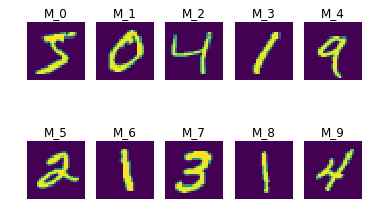

In [7]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.title("M_%d" % i)
    plt.axis("off")
    plt.imshow(x_train[i].reshape(28, 28), cmap=None)

plt.show()

In [8]:
x_train = x_train.reshape(60000, 784).astype('float32')
x_test = x_test.reshape(60000, 784).astype('float32')
x_train /= 255
x_test /= 255
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

ValueError: cannot reshape array of size 7840000 into shape (60000,784)

In [9]:
x_test = x_test.reshape(10000, 784).astype('float32')
x_train /= 255
x_test /= 255
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [10]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [11]:
model = Sequential()
model.add(layers.Dense(512, input_shape(784, )))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(512))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10))
model.add(layers.Activation('softmax'))
model.summary()

NameError: name 'input_shape' is not defined

In [12]:
model = Sequential()
model.add(layers.Dense(512, input_shape=(784, )))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(512))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10))
model.add(layers.Activation('softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [13]:
model.compile(optimizer=RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
es = EarlyStopping(monitor='val_loss', patience=2)
csv_logger = CSVLogger('mnist_training.log')
hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.1, callbacks=[es, csv_logger])


Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 4s 70us/step - loss: 0.2603 - accuracy: 0.9185 - val_loss: 0.0982 - val_accuracy: 0.9718
Epoch 2/20
54000/54000 [==============================] - 4s 67us/step - loss: 0.1080 - accuracy: 0.9664 - val_loss: 0.0952 - val_accuracy: 0.9727
Epoch 3/20
54000/54000 [==============================] - 4s 67us/step - loss: 0.0781 - accuracy: 0.9774 - val_loss: 0.0800 - val_accuracy: 0.9785
Epoch 4/20
54000/54000 [==============================] - 4s 70us/step - loss: 0.0626 - accuracy: 0.9808 - val_loss: 0.0755 - val_accuracy: 0.9810
Epoch 5/20
54000/54000 [==============================] - 4s 70us/step - loss: 0.0512 - accuracy: 0.9843 - val_loss: 0.0823 - val_accuracy: 0.9803
Epoch 6/20
54000/54000 [==============================] - 4s 71us/step - loss: 0.0453 - accuracy: 0.9867 - val_loss: 0.0912 - val_accuracy: 0.9795


In [15]:
score = model.evaluate(x_test, y_test, verbose=0)
print('test loss:', score[0])
print('test accuracy:', score[1])

test loss: 0.09034581240432189
test accuracy: 0.978600025177002


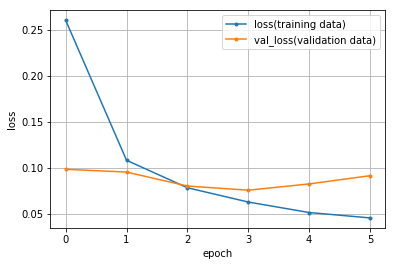

In [16]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = len(loss)
plt.plot(range(epochs), loss, marker='.', label='loss(training data)')
plt.plot(range(epochs), val_loss, marker='.', label='val_loss(validation data)')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()